<a href="https://colab.research.google.com/github/Deeksha-Data-Scientist/Airbnb-Bookings-Analysis/blob/master/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project by: Deeksha Pal**

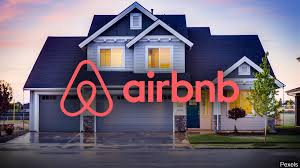




**Table of contents**
1.   Introduction
2.   Importing Required Libraries
3.   Acquaring and Loading Data
4.   Understanding data
4.   Data Cleaning
  *   Dealing with missing values
  *   Removing redundant variables
  *   Replacing all the missing values
  *   Dropping duplicates
  *   Drop Columns with Missing Values
  *   Remove the NaN values
5.  Data Preprocessing 
6.  Exploring and Visualizing Data :
  *   Get Correlation between different variables
  *   Plot all Neighbourhood Group
  *   Neighbourhood
  *   Relation between neighbourgroup and Availability of Room
  *   Neighbourhood group Mapping
  *   Neighbourhood Mapping
  *   Room Type
  *   Availabity of roooms








#**Introduction**

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#**Importing Required Libraries**

In this section, the drive is loaded onto the colab platform and then we import the files onto the colab platform.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#**Acquaring and Loading Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Airbnb NYC 2019.csv")

# **Understanding data**

In [5]:
# Getting an overview of the data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [47]:
#checking amount of rows in given dataset to understand the size we are working with
len(df)

48895

In [48]:
# Checking the number of rows and columns
df.shape


(48895, 16)

In [49]:
# Checking the data type of each column
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
# Checking data types and non-null values count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#**Data Cleaning**

Checking column with missing values

In the data cleaning, we Load the dataset into a data frame using Pandas,Explore the number of rows & columns, ranges of values etc.we then Handle missing, incorrect and invalid data and Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.). the further steps are explained along with the code.

In [50]:
#Removing the Duplicates if any

df.duplicated().sum()


0

In [ ]:
df.drop_duplicates(inplace=True)


After checking the info of the dataset we already were able to see NaN counts in each column, therefore need to examine missing values further before continuing with analysis

In [11]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The columns with missing values are name, host_name, last_review, and reviews_per_month.
The last two (last_review,reviews_per_month) are missing over 10,000 rows of data each. 
  The number of reviews per month can be interesting to analyze, so the best way to deal with this column is to replace all NaN values with zeros. As for the other three columns, they will not be used in this analysis and should be dropped.
  Therefore, let's proceed with removing columns that are not important and handling of missing data.

Removing redundant variables

In [12]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
#Please note that we are dropping'host_name' not only because it is insignificant but also for ethical reasons. There should be no reasoning to continue data exploration and model training (which we will be doing later) towards specific individuals based on their names. Why is that? Those names are assigned to actual humans, also they present no security threat or military/governmental interest based on the nature of the dataset, therefore names are unimportant to us.
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [13]:
# Examining Changes
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0



Replacing all the missing values



In [14]:
#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)


In [15]:
#examing changes
df.reviews_per_month.isnull().sum()

0

In [16]:
# Checking the changes
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
(df== 0).sum()


host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

In [18]:
# Remove the NaN values from the dataset
df.isnull().sum()


host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [19]:
df.dropna(how='any',inplace=True)
df.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

we now look at the availability of the airbnb.There are some airbnb's which are available for 0 days .Although this is allowed the number of reviews on them had a value. which means the airbnb has been reviewed even without somebody staying in there. hence, these values are dropped from the list.

In [20]:
for i in range(len(df)):
 if df.availability_365[i]==0 and df.number_of_reviews[i]!=0: 
  df.drop([i], inplace= True)


# **Data Visualization**

Exploratory Data Analysis

In [22]:
# Please note that we can use the describe() function to get various summary statistics, which exclude NaN values.

df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.620700e+04,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000
mean,7.627096e+07,40.728764,-73.950054,161.832491,7.955561,27.590079,1.307588,9.156185,152.303229
std,8.393650e+07,0.055803,0.049606,254.232662,22.787553,49.266153,1.735645,38.042091,131.818455
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.618096e+06,40.689220,-73.983240,70.000000,1.000000,0.000000,0.000000,1.000000,21.000000
50%,3.681609e+07,40.723890,-73.954760,110.000000,3.000000,6.000000,0.610000,1.000000,125.000000
75%,1.316910e+08,40.763180,-73.932070,187.000000,5.000000,32.000000,2.030000,3.000000,283.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


At first glance, the summary statistics shows us that the average price is 152.72, the average minimum nights stay is 7.03 nights, and the average number of reviews is 23.27 per listing. We also learn that a host has an average of 7.14 places listed and availability averages 112.78 vacant days per year.

Most importantly, the min price is showing as zero and the max price as 10,000. Something isn't right with the data, so need to look into this issue and check for outliers.

Print all the columns names


In [23]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

let's proceed with examing some interesting categorical unique values


In [24]:
#examining the unique values of n_group as this column will appear very handy for later analysis
# How many neighborhood groups are there?

df['neighbourhood_group'].unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [25]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
# How many neighborhoods are there?


df['neighbourhood'].unique()
len(df.neighbourhood.unique())


220

In [26]:
#examining the unique values of room_type as this column will appear very handy for later analysis
# How many room types are available for rental?

df['room_type'].unique()


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [28]:
# How many host listings are there?
df.host_id.nunique()

26388

The dataset has 16 columns and 48,895 rows, but a significant number of values seem to be missing from the last_review and reviews_per_month columns. It includes information about the listings, such as id, host name, room type, price, and neighborhood.

There are five different neighborhood groups, 221 neighborhoods, 37,457 hosts, 48,895 listings, and three types of room available for rental.

#Question 1:   What can we learn about different hosts and areas?


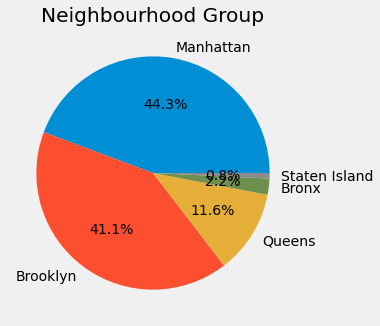

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group")
neighbourhood_group_count=df.neighbourhood_group.value_counts();
neighbourhood_group_label=df.neighbourhood_group.value_counts().index
pie_chart = plt.pie(neighbourhood_group_count, labels=neighbourhood_group_label,autopct='%1.1f%%', startangle=0)


The pie chart above shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels. We also know that from this map of Neighborhood Group.

We can see that Manhattan has the highest number of listings - making up for 45% of the total - followed by Brooklyn with 42%. The other three boroughs have significantly less listings: Queens (11%), Bronx (2%), and Staten Island (1%).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


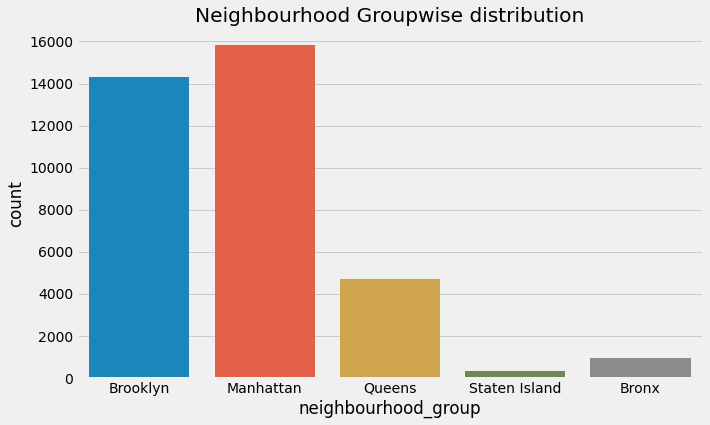

In [31]:
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Groupwise distribution")
sns.countplot(df.neighbourhood_group)
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


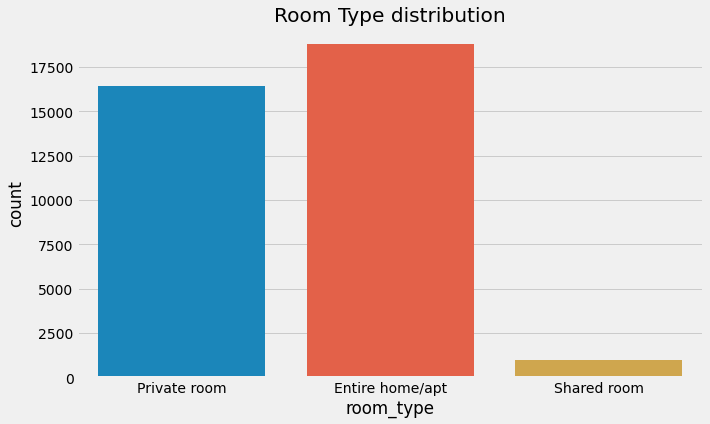

In [32]:
plt.figure(figsize=(10,6))
plt.title("Room Type distribution")
sns.countplot(df.room_type)
plt.ioff()

We can see that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


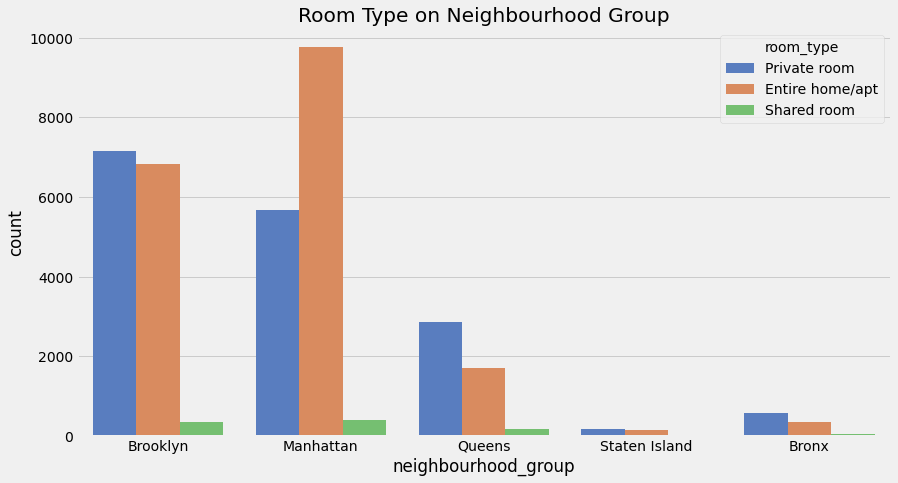

In [33]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()


The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.


from this plot, we can infer that although the number of airbnbs in Manhattan is more, The number of private airbnbs in Brooklyn is way more than in Manhattan.also, the total number of shared rooms are comparetively very less than anyothher type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


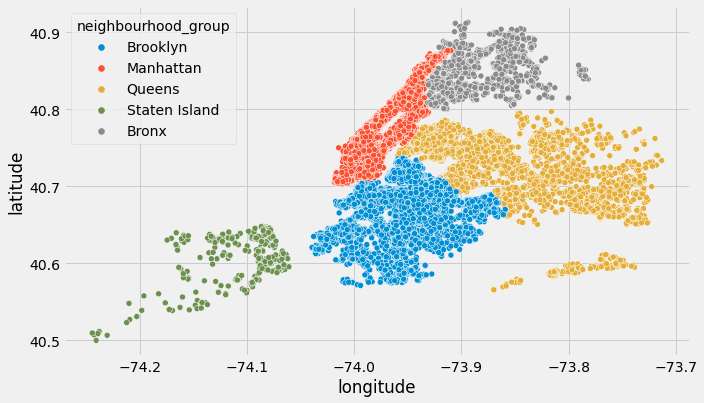

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

#Queation 2: What can we learn from predictions? (ex: locations, prices, reviews, etc)


*Get* Correlation between different variables


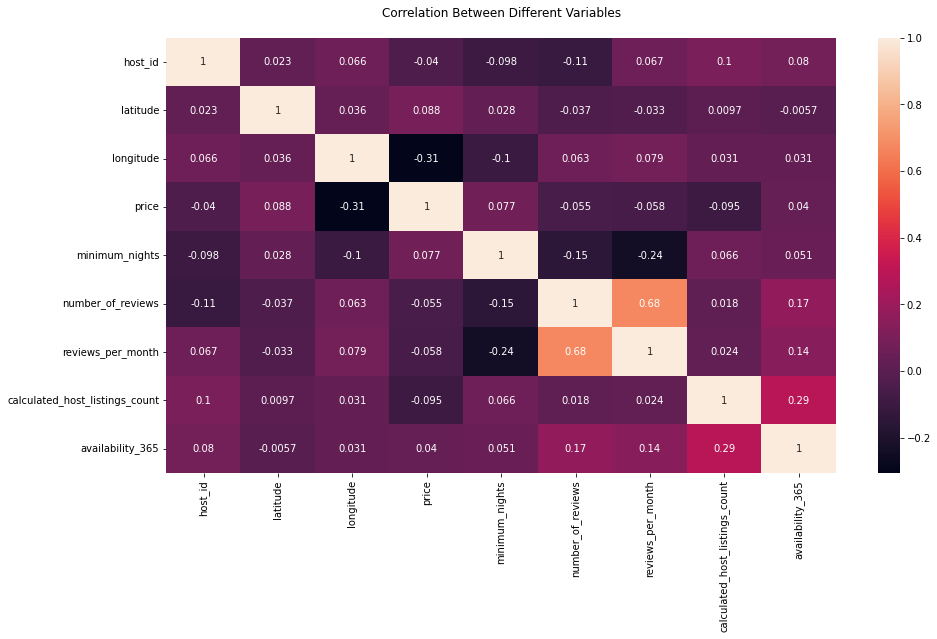

In [29]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()


From the graph above, we know that there is not a strong correlation except review_per_month and number_of_review.
We need to try to make a price prediction using some machine learning model.

# Price Prediction


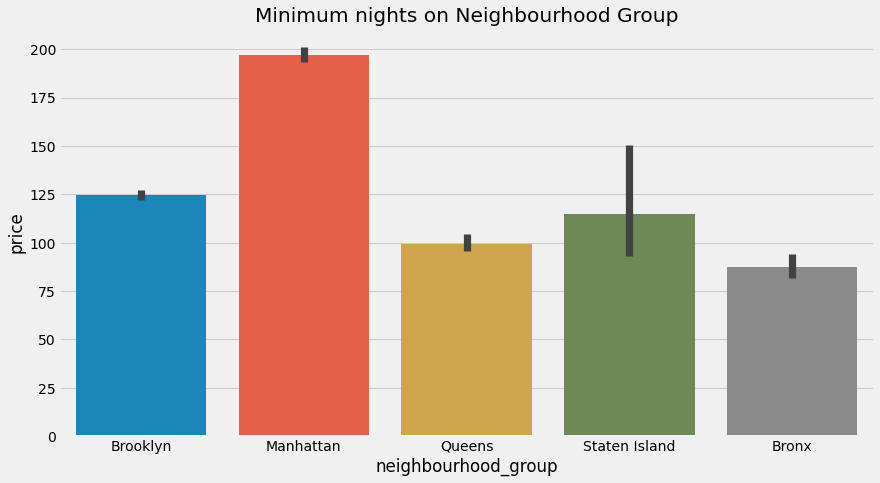

In [22]:
plt.figure(figsize=(13,7))
plt.title("Minimum nights on Neighbourhood Group")
sns.barplot(x=df.neighbourhood_group, y=df.price) 
plt.show()

# Reviews Prediction

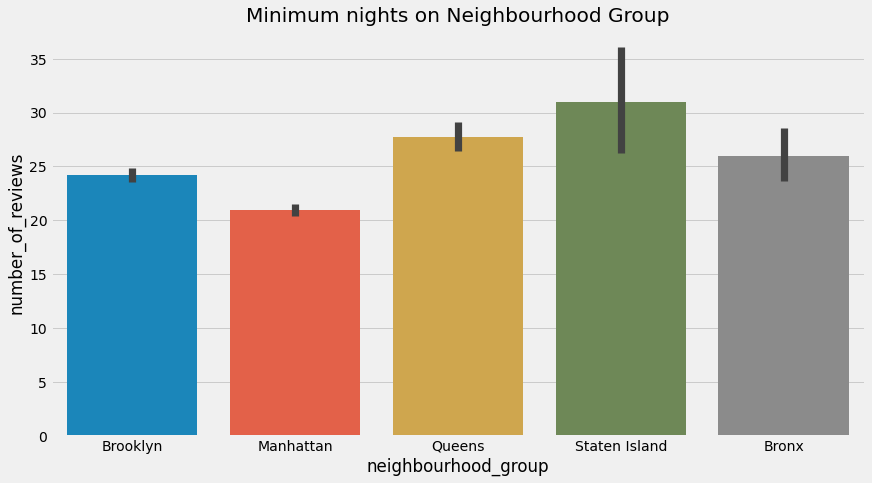

In [23]:
plt.figure(figsize=(13,7))
plt.title("number_of_reviews on Neighbourhood Group")
sns.barplot(x=df.neighbourhood_group, y=df.number_of_reviews) 
plt.show()

In [37]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
1271,2680820,Queens,Flushing,40.75578,-73.81948,Private room,55,1,474,5.53,3,332


In [38]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 64.9


This table format would be the most suitable output for better reading. From this table output, we can observe that top 10 most reviewed listings on Airbnb for NYC has price average of $65 with most of the listings under \$50, and 9/10 of them are 'Private room' type; top reviewed listing has 629 reviews.




# Queation 3: Which hosts are the busiest and why?

In [19]:
#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=df.host_id.value_counts().head(10)

In [20]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

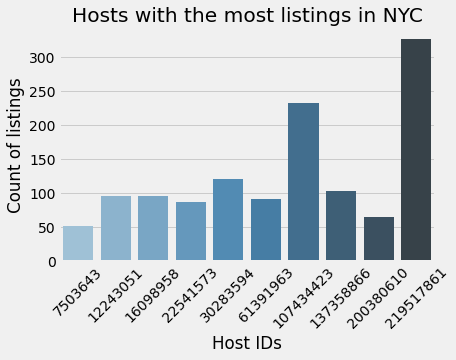

In [21]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

# Queation 4: Is there any noticeable difference of traffic among different areas and what could be the reason for it?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


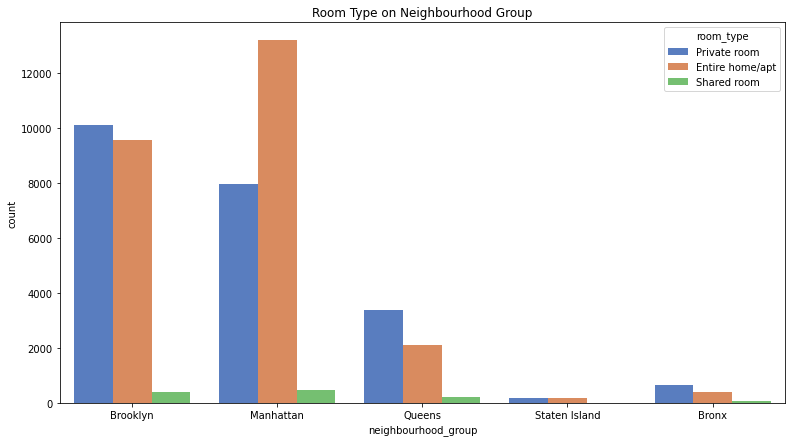

In [6]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.

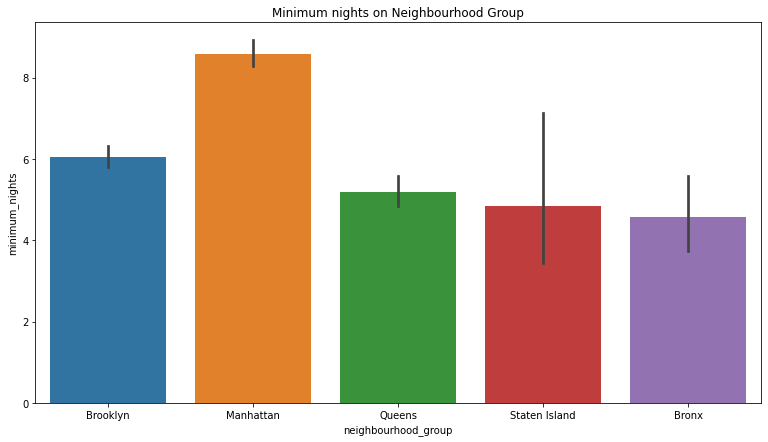

In [12]:
plt.figure(figsize=(13,7))
plt.title("Minimum nights on Neighbourhood Group")
sns.barplot(x=df.neighbourhood_group, y=df.minimum_nights) 
plt.show()

The graph shows that Manhattan has the highest count for minimum_nights.

---



Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

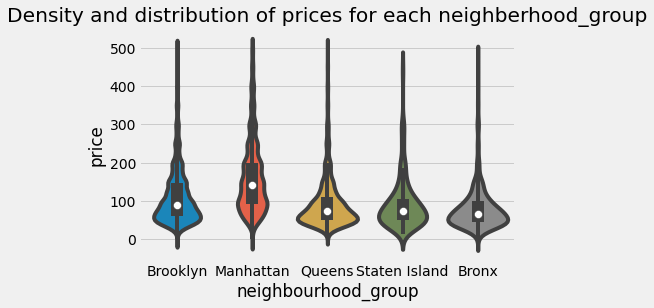

In [18]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization
#creating a sub-dataframe with no extreme values / less than 500
sub_df=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_df, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

with a violin plot we can definitely observe a couple of things about distribution and density of prices for Airbnb in NYC Groups. First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all.

 This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.


The Manhattan group has the highest no of listing due to some factor.
1. Manhattan has the highest booking of type Entire Home/Apartment.
2. Manhattan has the highest minimum_nights count.
3. Manhattan has a higher range of prices compared to the other.

So people who want to stay long, book **Entire Home/Apartment** and due to higher range of prices, people can get affordable booking with higer standard of living

